# Análises Descritivas:

Importação das bibliotecas necessárias e verificação da necessidade de limpeza de dados:

In [1]:
#%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Definição das colunas (segundo o arquivo iris.names)
colunas = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Carregando o dataset
iris_df = pd.read_csv("iris.data", names=colunas, sep=",")

# Exibindo as primeiras linhas
print(iris_df.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [3]:
# Verificando se há valores ausentes
print(iris_df.isnull().sum())

# Verificando se há valores duplicados
print("Valores duplicados:", iris_df.duplicated().sum())
# Mostrando todas as ocorrências de valores duplicados
duplicatas = iris_df[iris_df.duplicated(keep=False)]
print(duplicatas)

# Verificando tipos de dados
print(iris_df.dtypes)

#Removendo a frase "Iris-" antes dos nomes das espécies
iris_df['species'] = iris_df['species'].apply(lambda x: re.sub(r"Iris-", "", x))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Valores duplicados: 3
     sepal_length  sepal_width  petal_length  petal_width    species
9             4.9          3.1           1.5          0.1     setosa
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
101           5.8          2.7           5.1          1.9  virginica
142           5.8          2.7           5.1          1.9  virginica
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [4]:
#Traduzindo os nomes das colunas
iris_df.columns = ['Comprimento_Sepala', 'Largura_Sepala', 'Comprimento_Petala', 'Largura_Petala', 'Especies']
iris_df.head()

,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Largura_Petala,Especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Medidas de tendências central:

In [5]:
print("Média:\n", iris_df.mean(numeric_only=True))
print("\nMediana:\n", iris_df.median(numeric_only=True))
print("\nModa:\n", iris_df.mode().iloc[0])

Média:
 Comprimento_Sepala    5.843333
Largura_Sepala        3.054000
Comprimento_Petala    3.758667
Largura_Petala        1.198667
dtype: float64

Mediana:
 Comprimento_Sepala    5.80
Largura_Sepala        3.00
Comprimento_Petala    4.35
Largura_Petala        1.30
dtype: float64

Moda:
 Comprimento_Sepala       5.0
Largura_Sepala           3.0
Comprimento_Petala       1.5
Largura_Petala           0.2
Especies              setosa
Name: 0, dtype: object


Contagem de Amostras por espécie:

In [6]:
# Contando quantas amostras há por espécie
print(iris_df["Especies"].value_counts())

Especies
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Medidas de tendências central do conjunto por
espécie:

In [7]:
# Agrupando por espécie e calculando média, mediana e desvio padrão
media_especies = iris_df.groupby("Especies").mean(numeric_only=True)
mediana_especies = iris_df.groupby("Especies").median(numeric_only=True)
desvioPadrao_especies = iris_df.groupby("Especies").std(numeric_only=True)

In [8]:
print("Média: ")
media_especies

Média: 


,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Largura_Petala
Especies,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
print("Mediana: ")
mediana_especies

Mediana: 


,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Largura_Petala
Especies,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [10]:
print("Desvio padrão: ")
desvioPadrao_especies

Desvio padrão: 


,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Largura_Petala
Especies,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


Gráfico de Distribuição das Váriaveis:

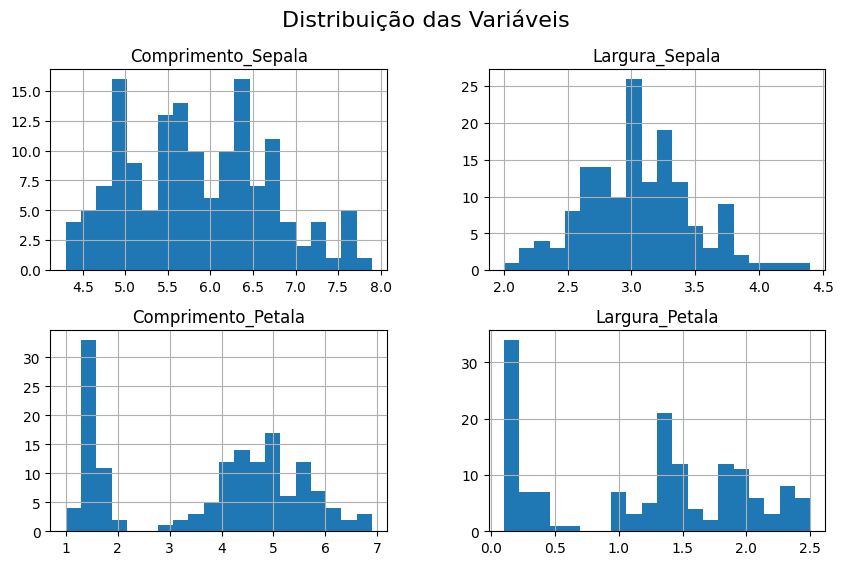

In [11]:
# Criando histogramas para cada variável numérica
iris_df.hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribuição das Variáveis", fontsize=16)

# Salvando o gráfico em um arquivo PNG
plt.savefig("Graficos/Histograma.png", dpi=300)

plt.show()

Boxplots de distribuição das variáveis por espécie:

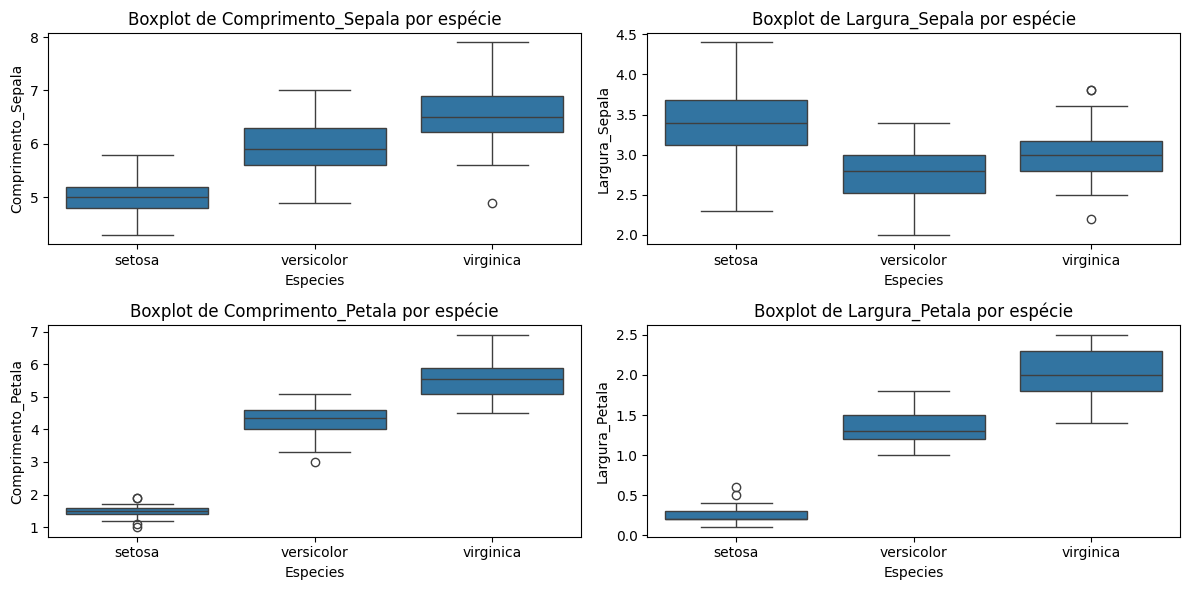

In [12]:
# Criando boxplots para cada variável, separadas por espécie
plt.figure(figsize=(12, 6))
for i, col in enumerate(iris_df.columns[:-1]):  # Ignorar a coluna de espécie
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="Especies", y=col, data=iris_df)
    plt.title(f"Boxplot de {col} por espécie")
plt.tight_layout()

# Salvando o gráfico em um arquivo PNG
plt.savefig("Graficos/BoxPlot.png", dpi=300)
plt.show()

Gráfico de correlação e exportação do gráfico: 

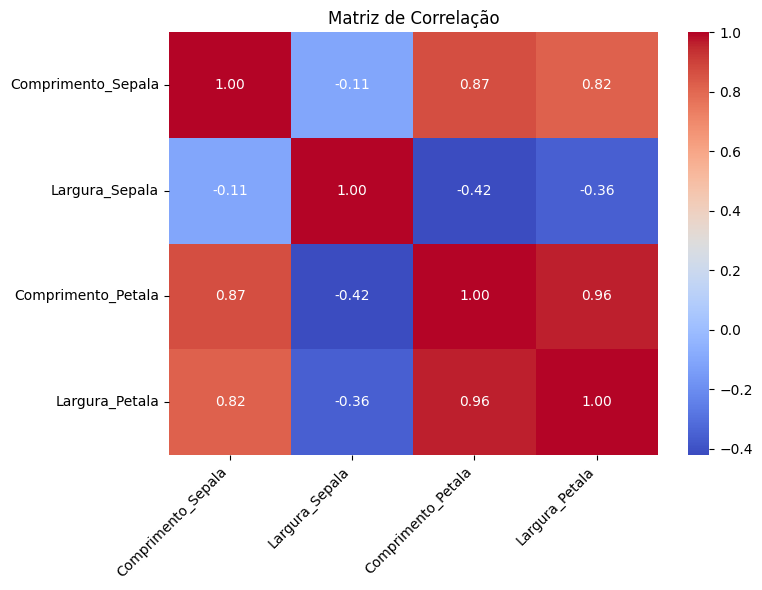

In [22]:
# Criando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvando o gráfico em um arquivo PNG
plt.savefig("Graficos/matriz_correlacao.png", dpi=300)
plt.show()

# Análise Preditiva (EXTRA):

Dividindo o conjunto de dados em conjunto de treinamento e
conjunto de teste:

In [12]:
from sklearn.model_selection import train_test_split

# Separando as variáveis preditoras (X) e a variável alvo (y)
X = iris_df.iloc[:, :-1]  
y = iris_df["Especies"]    

# Dividindo entre treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selecionando um algoritmo de aprendizado supervisionado e
construindo um modelo

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Criar e treinar o modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

Testando o modelo e gerando as métricas de acurácia, precisão e
recall para os resultados

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Calculando acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Mostrando relatório de classificação (precisão, recall, f1-score)
print(classification_report(y_test, y_pred))

Acurácia: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Aplicando a redução de dimensionalidade e refazendo os passos de
construção do modelo e testes

In [ ]:
from sklearn.decomposition import PCA


# Reduzindo para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Transformando em DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Especies"] = y

# Dividindo em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Treinando o modelo (Decision Tree)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia:  1.0
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

